In [13]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox as boxtest
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA


In [14]:
milk = pd.read_csv("./monthly-milk-production-pounds-p.csv")
milk = milk[:len(milk)-1]
milk.columns = ["date_month","y"]
milk["y"] = pd.to_numeric(milk["y"])
milk["y_log"] = np.log(milk["y"])
milk = milk.set_index("date_month")
print(milk.tail())

ts_y = pd.Series(milk["y"], index=milk.index)
ts_log = pd.Series(milk["y_log"], index=milk.index)

                y     y_log
date_month                 
1975-08     858.0  6.754604
1975-09     817.0  6.705639
1975-10     827.0  6.717805
1975-11     797.0  6.680855
1975-12     843.0  6.736967


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                              y_log   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 483.424
Date:                            Sun, 06 Jan 2019   AIC                           -960.848
Time:                                    15:55:31   BIC                           -951.718
Sample:                                01-01-1962   HQIC                          -957.139
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.341e-05      0.000     -0.214      0.830      -0.001       0.001
ma.S.L12      -0.6313      0.069   

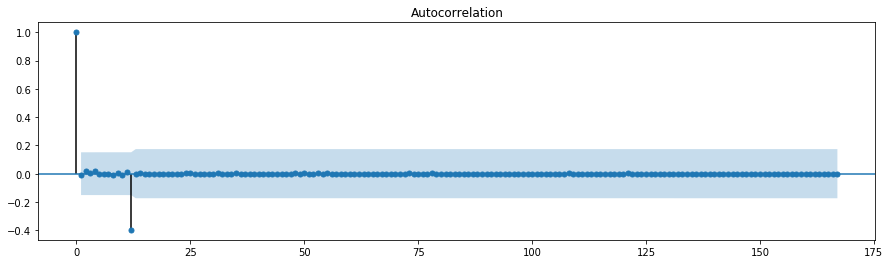

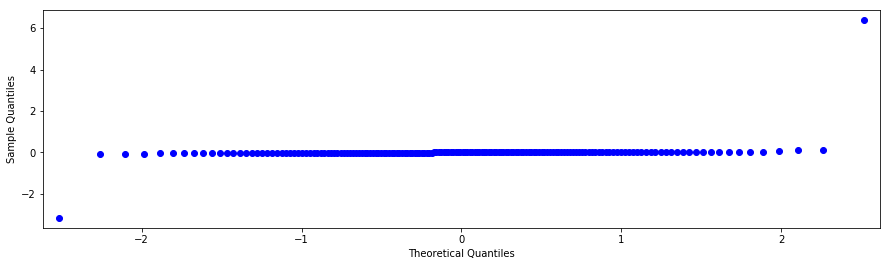

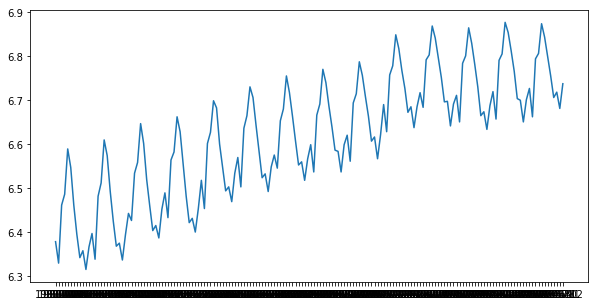

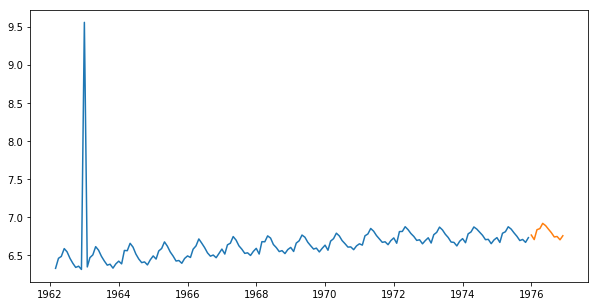

In [15]:
## Via SARIMA from stats package ##
## BEST MODEL with AIC value = -33.03

model=sm.tsa.statespace.SARIMAX(endog=ts_log,order=(0,1,0),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary()) ## Has less AIC value than other above models

## Residuals PLOT
res = results.resid 
fig2 = plot_acf(res)
fig2.set_size_inches(15,4)
fig1 = sm.qqplot(res)
fig1.set_size_inches(15,4)
plt.show()
## Forecast
fig4 = plt.figure()
fig4.set_size_inches(10,5)
plt.plot(ts_log)

prediction = results.predict()
forcst = results.forecast(12)
fig = plt.figure()
fig.set_size_inches(10,5)
plt.plot(prediction[2:])
plt.plot(forcst)

In [16]:
## 2. Using pmdarima : auto.arima()

# fit stepwise auto-ARIMA :- The stepwise approach follows the strategy laid out by Hyndman and Khandakar in their 2008 paper, “Automatic Time Series Forecasting: The forecast Package for R”.
stepwise_fit = pm.auto_arima(ts_log, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-960.097, BIC=-944.880, Fit time=2.317 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-910.708, BIC=-904.621, Fit time=0.053 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-947.613, BIC=-935.439, Fit time=0.650 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-961.078, BIC=-948.904, Fit time=0.380 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-960.230, BIC=-945.013, Fit time=1.246 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-916.190, BIC=-907.060, Fit time=0.147 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-960.395, BIC=-945.177, Fit time=1.971 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-958.286, BIC=-940.026, Fit time=3.173 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-960.848, BIC=-951.718, Fit time=0.787 seconds
Fit ARIMA: order=(0, 1, 2) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 484.539
Date:                            Sun, 06 Jan 2019   AIC                           -961.078
Time:                                    15:56:19   BIC                           -948.904
Sample:                                         0   HQIC                          -956.133
                                            - 168                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.822e-05      0.000     -0.192      0.848      -0.001       0.001
ma.L1         -0.2200      0.062     -3.563      0.000      -0.341      -0.099
ma.S.L12      -0.5478      0.074     -7.390      0.000      -0.693      -0.403
sigma2         0.0001   1.16e-05      9.425      0.000    8.69e-05       0.000
===================================================================================
Ljung-Box (Q):                       34.10   Jarque-Bera (JB):                26.95
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.65
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""